In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Data: konsumsi energi dari perusahan American Electric Power (AEP) dalam satuan Megawatt (MW)
# link: https://www.kaggle.com/robikscube/hourly-energy-consumption

df = pd.read_csv('data/AEP_hourly.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [6]:
# merubah tipe data object to datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# mengurutkan data berdasarkan waktu
df = df.sort_values('Datetime')

ts = df[-24*365:]
ts.reset_index(drop=True, inplace = True) 

print(ts.info())
print(ts['Datetime'].min(),ts['Datetime'].max())
print(ts['Datetime'].max()-ts['Datetime'].min())
ts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  8760 non-null   datetime64[ns]
 1   AEP_MW    8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB
None
2017-08-03 01:00:00 2018-08-03 00:00:00
364 days 23:00:00


,Datetime,AEP_MW
0,2017-08-03 01:00:00,13682.0
1,2017-08-03 02:00:00,12841.0
2,2017-08-03 03:00:00,12443.0
3,2017-08-03 04:00:00,12213.0
4,2017-08-03 05:00:00,12286.0


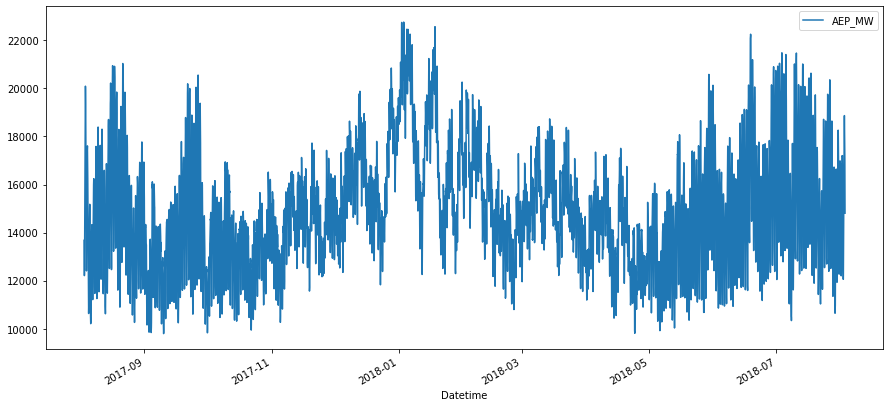

In [7]:
ts.set_index('Datetime',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
ts.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

To identify the nature of data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

#Ho: It is non-stationary
#H1: It is stationary
We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary

In [9]:
def adfuller_test(X):
    result=adfuller(X)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(ts['AEP_MW'])

ADF Test Statistic : -7.164582876872796
p-value : 2.90868156801461e-10
#Lags Used : 33
Number of Observations : 8726
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

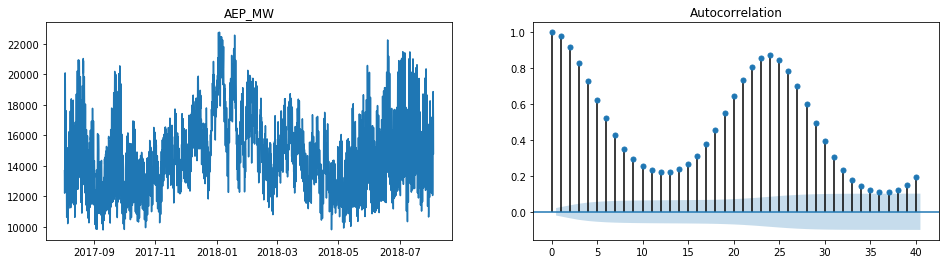

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(ts.AEP_MW)
ax1.set_title("AEP_MW")

plot_acf(ts.AEP_MW,ax=ax2);

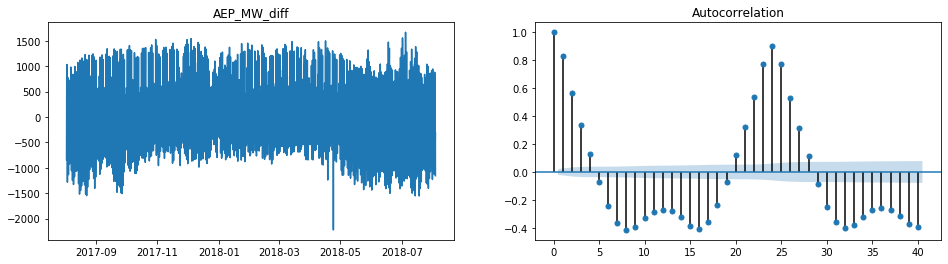

In [14]:
# Jika data tidak statsioner lakukan difrensiasi (y_t - y_t-1)

diff = ts.AEP_MW.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("AEP_MW_diff")

plot_acf(diff,ax=ax2);

In [15]:
adfuller_test(diff)

ADF Test Statistic : -15.9121517266675
p-value : 8.100590608188562e-29
#Lags Used : 37
Number of Observations : 8721
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [17]:
# cara lain untuk mengetahui berapa kali melakukan diferensiasi
# pip install pmdarima

from pmdarima.arima.utils import ndiffs

ndiffs(ts.AEP_MW, test = "adf")

0

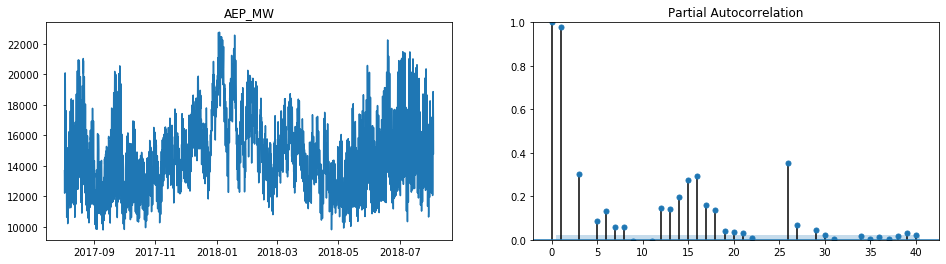

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(ts.AEP_MW)
ax1.set_title("AEP_MW")

ax2.set_ylim(0,1)
plot_pacf(ts.AEP_MW,ax=ax2); 

# p = 1

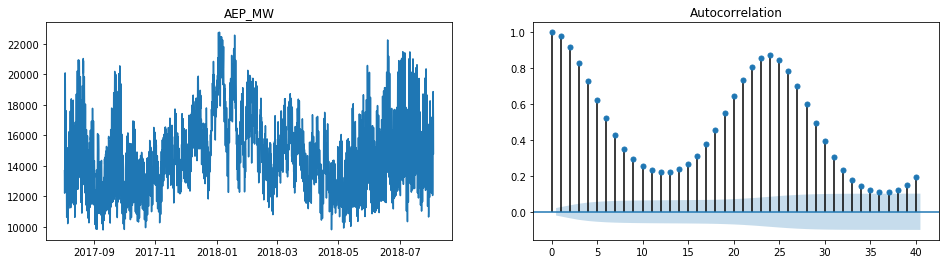

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(ts.AEP_MW)
ax1.set_title("AEP_MW")

plot_acf(ts.AEP_MW,ax=ax2);

# q = 1

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts.AEP_MW, order = (1,0,1))
result = model.fit(disp=0)

c:\users\fathu rahman\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 AEP_MW   No. Observations:                 8760
Model:                     ARMA(1, 1)   Log Likelihood              -63602.854
Method:                       css-mle   S.D. of innovations            344.258
Date:                Sun, 08 Aug 2021   AIC                         127213.707
Time:                        21:50:10   BIC                         127242.019
Sample:                             0   HQIC                        127223.354
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.496e+04    208.785     71.668      0.000    1.46e+04    1.54e+04
ar.L1.AEP_MW     0.9692      0.003    368.726      0.000       0.964       0.974
ma.L1.AEP_MW     0.7552      0.005    149.298      0.000       0.745       0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0318           +0.0000j            1.0318            0.0000
MA.1           -1.3241           +0.0000j            1.3241            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
residuals

,0
Datetime,
2017-08-03 01:00:00,-1281.130698
2017-08-03 02:00:00,-861.125379
2017-08-03 03:00:00,-46.218973
2017-08-03 04:00:00,-278.665336
2017-08-03 05:00:00,180.142146
...,...
2018-08-02 20:00:00,-238.537009
2018-08-02 21:00:00,-106.362921
2018-08-02 22:00:00,-149.582384


In [ ]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density = True)

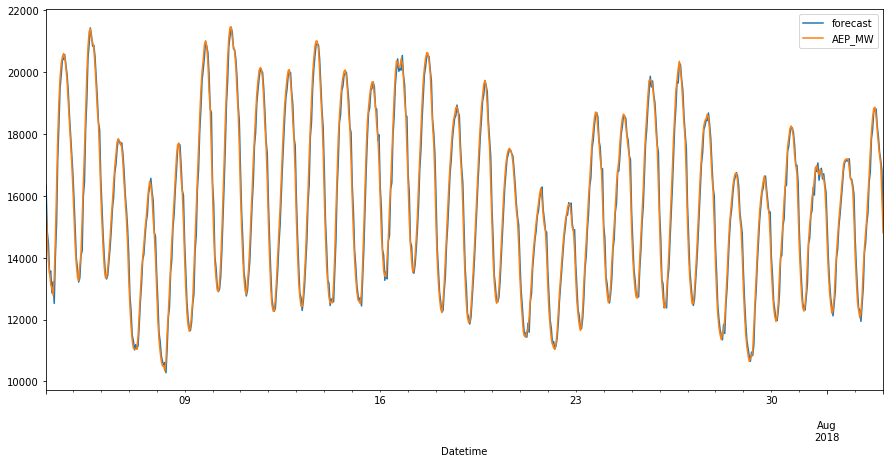

In [33]:
result.plot_predict(start = -24*30, dynamic= False);

In [50]:
model.predict(ts.AEP_MW)

array([ 1.36820000e+04,  1.36820000e+04, -1.07855991e+07, ...,
        4.65068250e+07,  4.26292248e+07,  2.93134193e+07])

In [34]:
n_future = 24*7

In [35]:
fc, se, conf = result.forecast(n_future)

In [43]:
index = pd.date_range(start='2018-08-03 01:00:00', periods=n_future, freq='H')
forecast = pd.Series(fc, index = index)
lower = pd.Series(conf[:,0], index = index)
upper = pd.Series(conf[:,1], index = index)

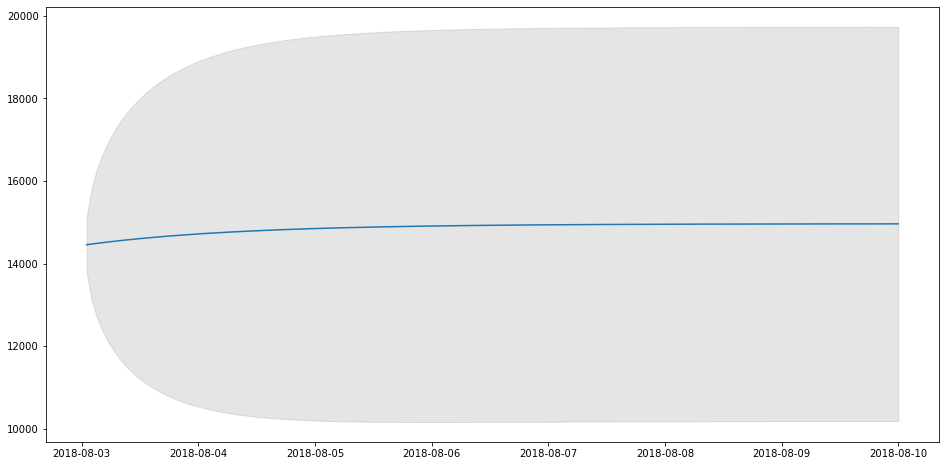

In [49]:
plt.figure(figsize=(16,8))
plt.plot(forecast, label = "forecast")
plt.fill_between(index, lower, upper, color ="k", alpha=0.1)

In [62]:
ts[-24*30:].AEP_MW

Datetime
2018-07-04 01:00:00    15498.0
2018-07-04 02:00:00    14635.0
2018-07-04 03:00:00    13895.0
2018-07-04 04:00:00    13509.0
2018-07-04 05:00:00    13135.0
                        ...   
2018-08-02 20:00:00    17673.0
2018-08-02 21:00:00    17303.0
2018-08-02 22:00:00    17001.0
2018-08-02 23:00:00    15964.0
2018-08-03 00:00:00    14809.0
Name: AEP_MW, Length: 720, dtype: float64

In [71]:
y_pred = model.predict(ts.AEP_MW, start = -24*30)

In [54]:
import seaborn as sns

In [57]:
ts[-24*30:].index

DatetimeIndex(['2018-07-04 01:00:00', '2018-07-04 02:00:00',
               '2018-07-04 03:00:00', '2018-07-04 04:00:00',
               '2018-07-04 05:00:00', '2018-07-04 06:00:00',
               '2018-07-04 07:00:00', '2018-07-04 08:00:00',
               '2018-07-04 09:00:00', '2018-07-04 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=720, freq=None)

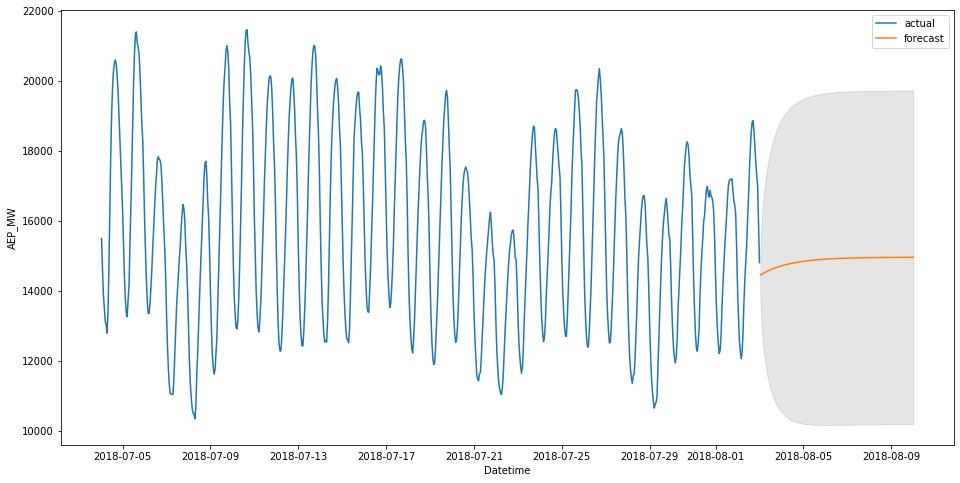

In [79]:
# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(16,8))
sns.lineplot(x=ts[-24*30:].index, y=ts[-24*30:].AEP_MW, label = 'actual')
sns.lineplot(x=index, y=fc, label = 'forecast')
plt.fill_between(index, lower, upper, color ="k", alpha=0.1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=122018.436, Time=8.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=134398.365, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=124366.232, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=127351.024, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=134396.365, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=123167.405, Time=3.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=122345.550, Time=4.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=121971.293, Time=9.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=123164.104, Time=4.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=121392.918, Time=12.87 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=121884.330, Time=16.67 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=121402.727, Time=15.59 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=121453.905, Time=12.91 sec
 ARIMA(

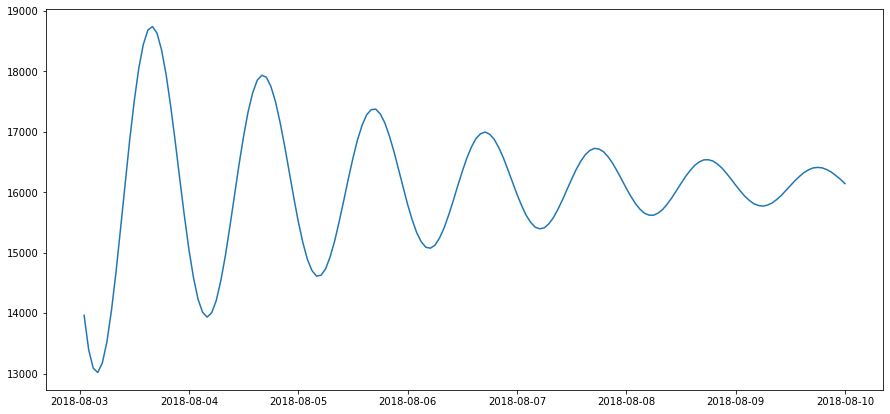

In [80]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(ts.AEP_MW, trace=True, error_action='ignore', suppress_warnings=True)
model.summary()
model.fit(ts.AEP_MW)

forecast = model.predict(n_periods=n_future)
forecast = pd.DataFrame(forecast,index = index)

#plot the predictions for validation set
plt.plot(forecast, label='Prediction')
plt.show()

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8760
Model:               SARIMAX(4, 1, 4)   Log Likelihood              -60662.702
Date:                Sun, 08 Aug 2021   AIC                         121343.404
Time:                        22:57:49   BIC                         121407.105
Sample:                             0   HQIC                        121365.109
                               - 8760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4426      0.014    101.408      0.000       1.415       1.470
ar.L2          0.4400      0.014     32.483      0.000       0.413       0.467
ar.L3         -1.4574      0.015    -99.868      0.000      -1.486      -1.429
ar.L4          0.5138      0.014     35.805      0.000       0.486       0.542
ma.L1         -0.5208      0.015    -35.023      0.000      -0.550      -0.492
ma.L2         -1.3118      0.011   -114.080      0.000      -1.334      -1.289
ma.L3          0.5456      0.015     36.593      0.000       0.516       0.575
ma.L4          0.3715      0.012     31.981      0.000       0.349       0.394
sigma2      6.747e+04    821.539     82.124      0.000    6.59e+04    6.91e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.61   Jarque-Bera (JB):              2091.17
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""